In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
np.random.seed(seed=1)

In [2]:
#Parameters
n = 100 # Number of rows
Lambda = 0 # Regularisation parameter
alpha = 1 # Noise variance
sigma = 1 # Theta's variance
gamma_pw = 0.0005 # Value for the diagonal blocks of the Piecewise constant Variance profile, the other blocks are set to 1
gamma_block_1 = 0.005 # Value for the diagonal blocks of the Block Variance profile
gamma_block_2 = 10 # Value for blocks of the Block Variance profile
gamma_block_3 = 0.01 # Value for other blocks of the Block Variance profile
tau = 0.005 # Parameter of the Polynomial Variance profile

In [3]:
ratio_dim = np.linspace(0.1,6,80)
ratios_final = [] # List of the ratios n/p 
Equivalent_risk_pw = [] # List of deterministic equivalent for various ratios p/n in the case of a Piecewise constant Variance profile
Equivalent_risk_block = [] # List of deterministic equivalent for various ratios p/n in the case of a Block Variance profile
Equivalent_risk_poly = [] # List of deterministic equivalent for various ratios p/n in the case of a Polynomial Variance profile


Risk_pw = [] # List of predictive risk for various ratios p/n in the case of a Piecewise constant Variance profile
Risk_block = [] # List of predictive risk for various ratios p/n in the case of a Block Variance profile
Risk_poly = [] # List of predictive risk for various ratios p/n in the case of a Polynomial Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns

  #Choice of the Variance profile
  Gamma_pw = utils.variance_profile('const_piecewise', n, p, tau = gamma_pw) # Piecewise constant Variance profile for the training set
  Gamma_block = utils.variance_profile('block', n, p, tau = gamma_block_1, tau2 = gamma_block_2, tau3 = gamma_block_3) # Block Variance profile for the training set
  Gamma_poly = utils.variance_profile('polynomial', n, p, tau = tau) # Polynomial Variance profile for the training set

  Gamma_pw_test = utils.variance_profile('const_piecewise', 1, p, tau = gamma_pw) # Piecewise constant Variance profile for the test set
  Gamma_block_test = utils.variance_profile('block', 1, p, tau = gamma_block_1, tau2 = gamma_block_2, tau3 = gamma_block_3) # Block Variance profile for the test set
  Gamma_poly_test = utils.variance_profile('polynomial', 1, p, tau = tau) # Polynomial Variance profile for the test set

  if p != n: # If n=p the predictive risk is not defined, thus we avoid this situation
    ratios_final.append(r)
    risk_pw, equivalent_risk_pw, _ = utils.R_ts(Lambda, Gamma_pw, Gamma_pw_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Piecewise constant Variance profile
    risk_block, equivalent_risk_block, _ = utils.R_ts(Lambda, Gamma_block, Gamma_block_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Block Variance profile
    risk_poly, equivalent_risk_poly, _ = utils.R_ts(Lambda, Gamma_poly, Gamma_poly_test, n, p, alpha = alpha, sig = sigma) # Predictive risk and Deterministic equivalent for the Polynomial Variance profile

    Equivalent_risk_pw.append(equivalent_risk_pw)
    Equivalent_risk_block.append(equivalent_risk_block)
    Equivalent_risk_poly.append(equivalent_risk_poly)

    
    Risk_pw.append(risk_pw)
    Risk_block.append(risk_block)
    Risk_poly.append(risk_poly)

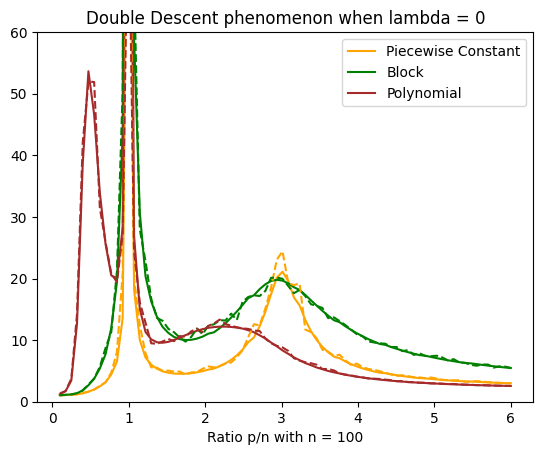

In [4]:
fig, ax = plt.subplots()
ax.plot(ratios_final, Equivalent_risk_pw, color = 'orange')
ax.plot(ratios_final, Equivalent_risk_block, color = 'green')
ax.plot(ratios_final, Equivalent_risk_poly, color = 'brown')

ax.plot(ratios_final, Risk_pw, '--', color = 'orange')
ax.plot(ratios_final, Risk_block, '--', color = 'green')
ax.plot(ratios_final, Risk_poly, '--', color = 'brown')

plt.legend(["Piecewise Constant", "Block", "Polynomial"])
plt.xlabel("Ratio p/n with n = 100")
plt.title("Double Descent phenomenon when lambda = 0")
plt.ylim(0,60)
plt.show()

In [ ]:
n = 300 # Number of rows

ratio_dim = np.linspace(0.1,6,50) # Ratios p/n
eig_pw = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Piecewise constant Variance profile
eig_block = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Block Variance profile
eig_poly = [] # List of Smallest non-zero eigenvalue of the covariance matrix for various ratios p/n in the case of the Polynomial Variance profile

for r in ratio_dim:
  p = int(n*r) # Number of columns
  print(p)
  Gamma_pw = utils.variance_profile('const_piecewise', n, p, tau = gamma_pw) # Piecewise constant Variance profile
  X_pw = np.sqrt(Gamma_pw) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Piecewise constant Variance profile
  eig_pw.append(max(np.real(np.min(np.linalg.eigvals((X_pw @ X_pw.T)/n))), np.real(np.min(np.linalg.eigvals(X_pw.T @ X_pw/n)))))
    
  Gamma_block = utils.variance_profile('block', n, p, tau = gamma_block_1, tau2 = gamma_block_2, tau3 = gamma_block_3) # Block Variance profile
  X_block = np.sqrt(Gamma_block) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Block Variance profile
  eig_block.append(max(np.real(np.min(np.linalg.eigvals((X_block @ X_block.T)/n))), np.real(np.min(np.linalg.eigvals(X_block.T @ X_block/n)))))

  Gamma_poly = utils.variance_profile('polynomial', n, p, tau = tau) # Polynomial Variance profile for the training set
  X_poly = np.sqrt(Gamma_poly) * np.random.normal(0,1,size = (n,p)) # Data matrix with a Polynomial Variance profile
  eig_poly.append(max(np.real(np.min(np.linalg.eigvals((X_poly @ X_poly.T)/n))), np.real(np.min(np.linalg.eigvals(X_poly.T @ X_poly/n)))))

In [ ]:
plt.plot(ratio_dim,eig_pw, color = 'orange')
plt.plot(ratio_dim,eig_block, color = 'green')
plt.plot(ratio_dim,eig_poly, color = 'brown')
plt.xlabel("Ratio p/n with n = 300")
plt.ylabel("Smallest non-zero eigenvalue \n of the covariance matrix")
plt.legend(["Piecewise Constant", "Block", "Polynomial"])